In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import files
uploaded = files.upload()

Saving SalaryData_Test.csv to SalaryData_Test.csv


In [4]:
from google.colab import files
uploaded2 = files.upload()

Saving SalaryData_Train.csv to SalaryData_Train.csv


In [5]:
test = pd.read_csv('SalaryData_Test.csv')
train = pd.read_csv('SalaryData_Train.csv')

In [6]:
test.head()

age   workclass      education  educationno        maritalstatus  \
0   25     Private           11th            7        Never-married   
1   38     Private        HS-grad            9   Married-civ-spouse   
2   28   Local-gov     Assoc-acdm           12   Married-civ-spouse   
3   44     Private   Some-college           10   Married-civ-spouse   
4   34     Private           10th            6        Never-married   

           occupation    relationship    race    sex  capitalgain  \
0   Machine-op-inspct       Own-child   Black   Male            0   
1     Farming-fishing         Husband   White   Male            0   
2     Protective-serv         Husband   White   Male            0   
3   Machine-op-inspct         Husband   Black   Male         7688   
4       Other-service   Not-in-family   White   Male            0   

   capitalloss  hoursperweek          native  Salary  
0            0            40   United-States   <=50K  
1            0            50   United-States   <=50K  
2            0            40   United-States    >50K  
3            0            40   United-States    >50K  
4            0            30   United-States   <=50K

In [7]:
train.head()

age          workclass   education  educationno        maritalstatus  \
0   39          State-gov   Bachelors           13        Never-married   
1   50   Self-emp-not-inc   Bachelors           13   Married-civ-spouse   
2   38            Private     HS-grad            9             Divorced   
3   53            Private        11th            7   Married-civ-spouse   
4   28            Private   Bachelors           13   Married-civ-spouse   

           occupation    relationship    race      sex  capitalgain  \
0        Adm-clerical   Not-in-family   White     Male         2174   
1     Exec-managerial         Husband   White     Male            0   
2   Handlers-cleaners   Not-in-family   White     Male            0   
3   Handlers-cleaners         Husband   Black     Male            0   
4      Prof-specialty            Wife   Black   Female            0   

   capitalloss  hoursperweek          native  Salary  
0            0            40   United-States   <=50K  
1            0            13   United-States   <=50K  
2            0            40   United-States   <=50K  
3            0            40   United-States   <=50K  
4            0            40            Cuba   <=50K

In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [10]:
train[train.duplicated()]

age workclass      education  educationno        maritalstatus  \
326     33   Private      Bachelors           13   Married-civ-spouse   
364     27   Private      Bachelors           13        Never-married   
518     24   Private        HS-grad            9        Never-married   
525     24   Private        HS-grad            9        Never-married   
619     33   Private      Bachelors           13   Married-civ-spouse   
...    ...       ...            ...          ...                  ...   
30110   47   Private        HS-grad            9   Married-civ-spouse   
30118   20   Private        HS-grad            9        Never-married   
30132   22   Private   Some-college           10        Never-married   
30157   40   Private        HS-grad            9   Married-civ-spouse   
30159   22   Private        HS-grad            9        Never-married   

               occupation    relationship    race      sex  capitalgain  \
326       Exec-managerial         Husband   White     Male            0   
364          Craft-repair   Not-in-family   White     Male            0   
518     Handlers-cleaners       Unmarried   Black   Female            0   
525          Craft-repair       Own-child   White     Male            0   
619       Exec-managerial         Husband   White     Male            0   
...                   ...             ...     ...      ...          ...   
30110        Craft-repair         Husband   White     Male            0   
30118   Machine-op-inspct       Own-child   White     Male            0   
30132        Adm-clerical       Own-child   White     Male            0   
30157   Machine-op-inspct         Husband   White     Male            0   
30159        Adm-clerical       Own-child   White     Male            0   

       capitalloss  hoursperweek          native  Salary  
326              0            40   United-States    >50K  
364              0            50   United-States   <=50K  
518              0            40   United-States   <=50K  
525              0            40   United-States   <=50K  
619              0            40   United-States    >50K  
...            ...           ...             ...     ...  
30110            0            40   United-States   <=50K  
30118            0            40   United-States   <=50K  
30132            0            40   United-States   <=50K  
30157            0            40   United-States    >50K  
30159            0            20   United-States   <=50K  

[3258 rows x 14 columns]

In [11]:
train_data = train.drop_duplicates()

In [12]:
test[test.duplicated()]

age workclass      education  educationno        maritalstatus  \
551     59   Private        HS-grad            9             Divorced   
601     32   Private        HS-grad            9   Married-civ-spouse   
681     40   Private        HS-grad            9   Married-civ-spouse   
799     24   Private      Bachelors           13        Never-married   
1044    44   Private    Prof-school           15   Married-civ-spouse   
...    ...       ...            ...          ...                  ...   
15043   51   Private        HS-grad            9   Married-civ-spouse   
15044   22   Private   Some-college           10        Never-married   
15049   32   Private        HS-grad            9   Married-civ-spouse   
15052   31   Private        HS-grad            9   Married-civ-spouse   
15053   25   Private        HS-grad            9        Never-married   

               occupation    relationship    race      sex  capitalgain  \
551         Other-service   Not-in-family   White   Female            0   
601                 Sales         Husband   White     Male            0   
681          Craft-repair         Husband   White     Male            0   
799        Prof-specialty   Not-in-family   White     Male            0   
1044       Prof-specialty         Husband   White     Male        99999   
...                   ...             ...     ...      ...          ...   
15043        Craft-repair         Husband   White     Male            0   
15044        Craft-repair       Own-child   White     Male            0   
15049   Handlers-cleaners         Husband   White     Male            0   
15052        Craft-repair         Husband   White     Male            0   
15053       Other-service       Own-child   White   Female            0   

       capitalloss  hoursperweek          native  Salary  
551              0            40   United-States   <=50K  
601              0            40   United-States   <=50K  
681              0            40   United-States   <=50K  
799              0            35   United-States   <=50K  
1044             0            60   United-States    >50K  
...            ...           ...             ...     ...  
15043            0            40   United-States   <=50K  
15044            0            40   United-States   <=50K  
15049            0            40   United-States   <=50K  
15052            0            40   United-States   <=50K  
15053            0            40   United-States   <=50K  

[930 rows x 14 columns]

In [13]:
test_data = test.drop_duplicates()

In [14]:
test_data.isnull().any()

age              False
workclass        False
education        False
educationno      False
maritalstatus    False
occupation       False
relationship     False
race             False
sex              False
capitalgain      False
capitalloss      False
hoursperweek     False
native           False
Salary           False
dtype: bool

In [15]:
train_data.isnull().any()

age              False
workclass        False
education        False
educationno      False
maritalstatus    False
occupation       False
relationship     False
race             False
sex              False
capitalgain      False
capitalloss      False
hoursperweek     False
native           False
Salary           False
dtype: bool

In [16]:
train_data.head()

age          workclass   education  educationno        maritalstatus  \
0   39          State-gov   Bachelors           13        Never-married   
1   50   Self-emp-not-inc   Bachelors           13   Married-civ-spouse   
2   38            Private     HS-grad            9             Divorced   
3   53            Private        11th            7   Married-civ-spouse   
4   28            Private   Bachelors           13   Married-civ-spouse   

           occupation    relationship    race      sex  capitalgain  \
0        Adm-clerical   Not-in-family   White     Male         2174   
1     Exec-managerial         Husband   White     Male            0   
2   Handlers-cleaners   Not-in-family   White     Male            0   
3   Handlers-cleaners         Husband   Black     Male            0   
4      Prof-specialty            Wife   Black   Female            0   

   capitalloss  hoursperweek          native  Salary  
0            0            40   United-States   <=50K  
1            0            13   United-States   <=50K  
2            0            40   United-States   <=50K  
3            0            40   United-States   <=50K  
4            0            40            Cuba   <=50K

In [17]:
test_data.head()

age   workclass      education  educationno        maritalstatus  \
0   25     Private           11th            7        Never-married   
1   38     Private        HS-grad            9   Married-civ-spouse   
2   28   Local-gov     Assoc-acdm           12   Married-civ-spouse   
3   44     Private   Some-college           10   Married-civ-spouse   
4   34     Private           10th            6        Never-married   

           occupation    relationship    race    sex  capitalgain  \
0   Machine-op-inspct       Own-child   Black   Male            0   
1     Farming-fishing         Husband   White   Male            0   
2     Protective-serv         Husband   White   Male            0   
3   Machine-op-inspct         Husband   Black   Male         7688   
4       Other-service   Not-in-family   White   Male            0   

   capitalloss  hoursperweek          native  Salary  
0            0            40   United-States   <=50K  
1            0            50   United-States   <=50K  
2            0            40   United-States    >50K  
3            0            40   United-States    >50K  
4            0            30   United-States   <=50K

In [18]:
str_cols = ['workclass', 'education', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'native']

In [19]:
# Label Encoding
label = LabelEncoder()
for i in str_cols:
    train_data[i] = label.fit_transform(train_data[i])
    test_data[i] = label.fit_transform(test_data[i])

In [20]:
train_data.head()

age  workclass  education  educationno  maritalstatus  occupation  \
0   39          5          9           13              4           0   
1   50          4          9           13              2           3   
2   38          2         11            9              0           5   
3   53          2          1            7              2           5   
4   28          2          9           13              2           9   

   relationship  race  sex  capitalgain  capitalloss  hoursperweek  native  \
0             1     4    1         2174            0            40      37   
1             0     4    1            0            0            13      37   
2             1     4    1            0            0            40      37   
3             0     2    1            0            0            40      37   
4             5     2    0            0            0            40       4   

   Salary  
0   <=50K  
1   <=50K  
2   <=50K  
3   <=50K  
4   <=50K

In [29]:
test_data.head()

age  workclass  education  educationno  maritalstatus  occupation  \
0   25          2          1            7              4           6   
1   38          2         11            9              2           4   
2   28          1          7           12              2          10   
3   44          2         15           10              2           6   
4   34          2          0            6              4           7   

   relationship  race  sex  capitalgain  capitalloss  hoursperweek  native  \
0             3     2    1            0            0            40      37   
1             0     4    1            0            0            50      37   
2             0     4    1            0            0            40      37   
3             0     2    1         7688            0            40      37   
4             1     4    1            0            0            30      37   

   Salary  
0   <=50K  
1   <=50K  
2    >50K  
3    >50K  
4   <=50K

In [31]:
data = test_data.append(train_data)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41033 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            41033 non-null  int64 
 1   workclass      41033 non-null  int64 
 2   education      41033 non-null  int64 
 3   educationno    41033 non-null  int64 
 4   maritalstatus  41033 non-null  int64 
 5   occupation     41033 non-null  int64 
 6   relationship   41033 non-null  int64 
 7   race           41033 non-null  int64 
 8   sex            41033 non-null  int64 
 9   capitalgain    41033 non-null  int64 
 10  capitalloss    41033 non-null  int64 
 11  hoursperweek   41033 non-null  int64 
 12  native         41033 non-null  int64 
 13  Salary         41033 non-null  object
dtypes: int64(13), object(1)
memory usage: 4.7+ MB


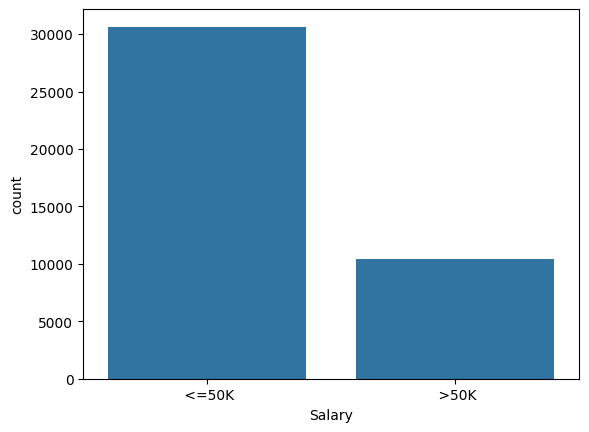

 <=50K    30643
 >50K     10390
Name: Salary, dtype: int64

In [33]:
sns.countplot(x='Salary',data = data)
plt.xlabel('Salary')
plt.ylabel('count')
plt.show()
data['Salary'].value_counts()

<Axes: xlabel='education'>

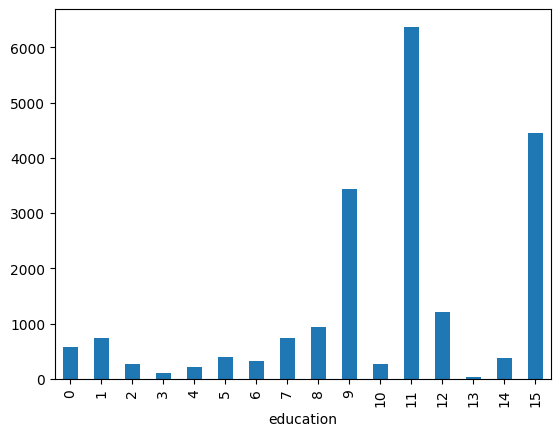

In [36]:
pd.crosstab(data['Salary'],data['education']).mean().plot(kind='bar')

<Axes: xlabel='occupation'>

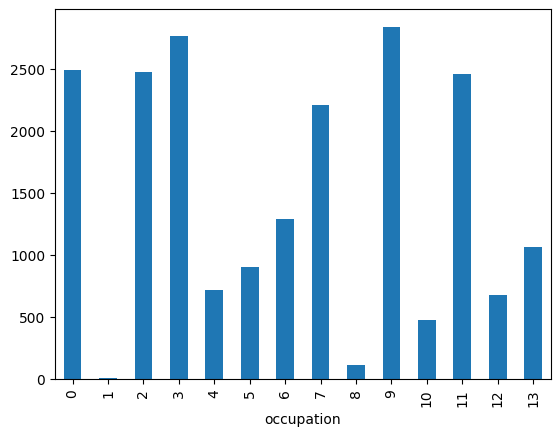

In [37]:
pd.crosstab(data['Salary'],data['occupation']).mean().plot(kind='bar')

<Axes: xlabel='sex'>

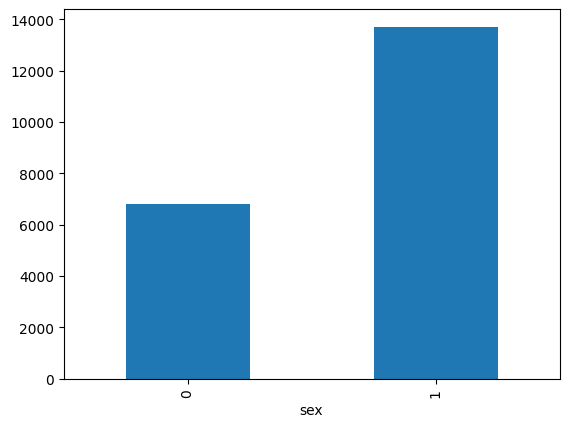

In [39]:
pd.crosstab(data['Salary'],data['sex']).mean().plot(kind='bar')

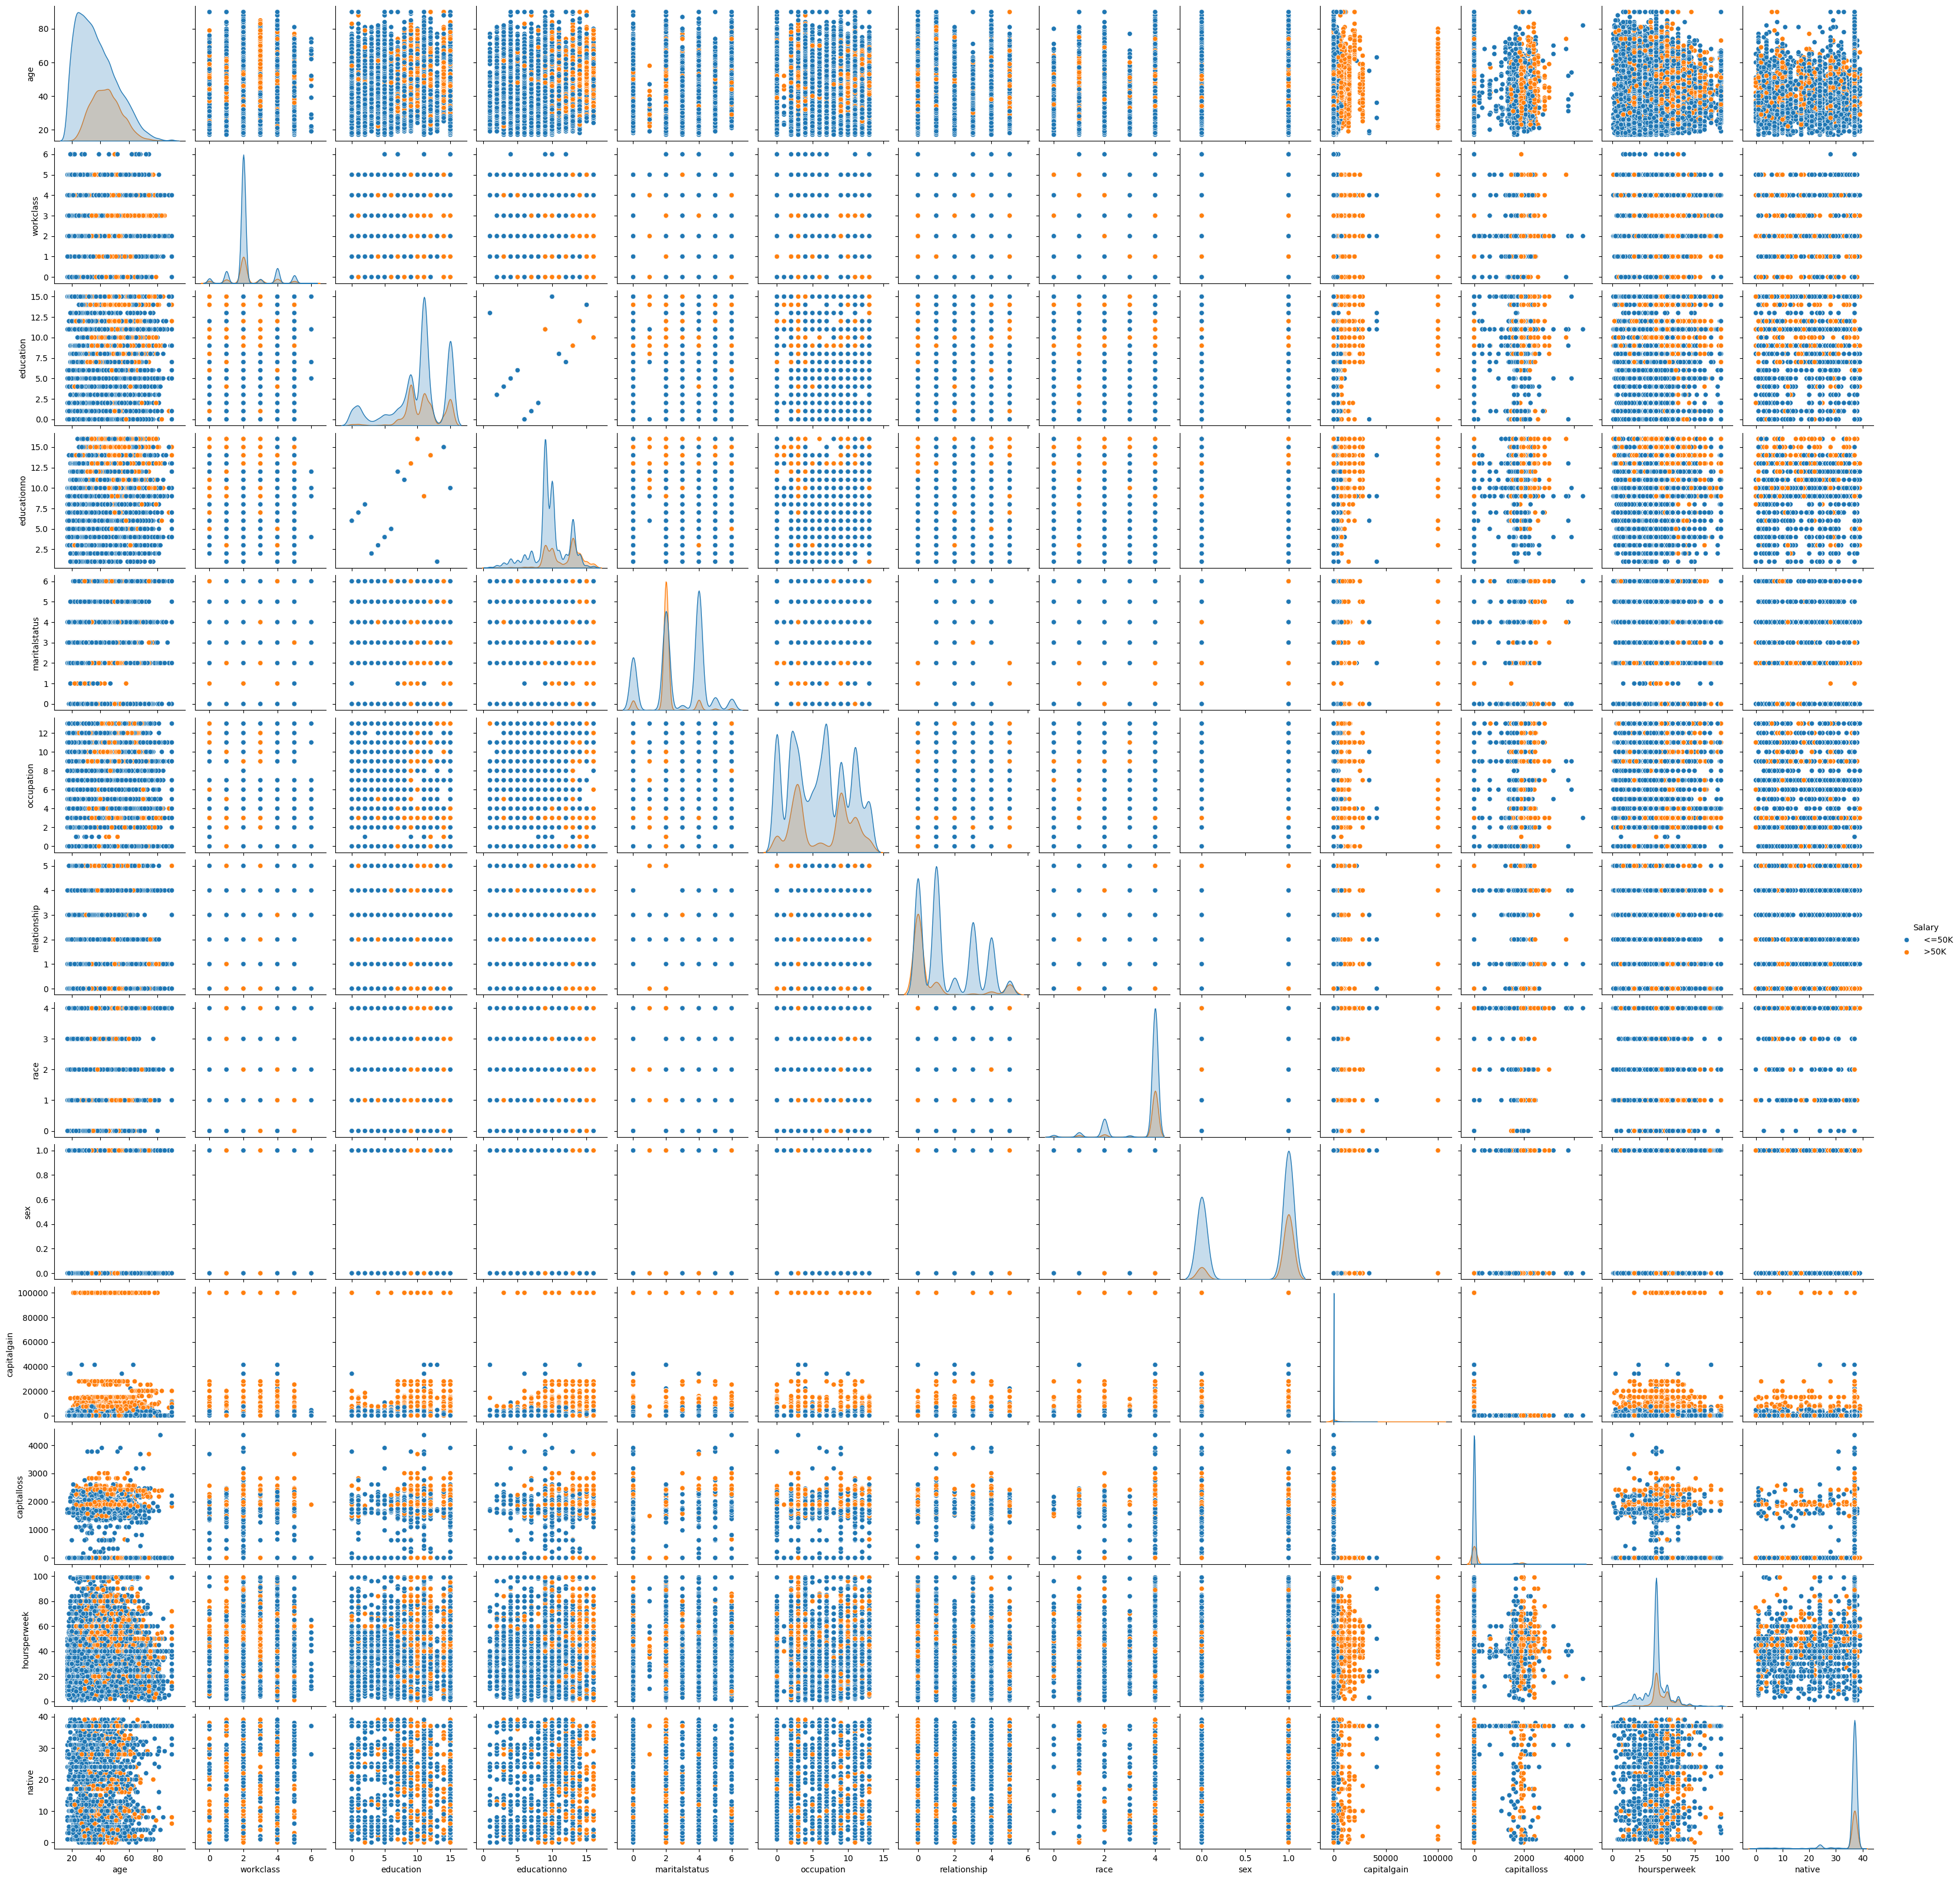

In [41]:
sns.pairplot(data, hue='Salary')

In [44]:
fig, ax = plt.subplots(3,4, figsize = (17,12),dpi=600)

sns.distplot(data.age, ax = ax[0,0])
sns.distplot(data.workclass, ax = ax[0,1])
sns.distplot(data.education, ax = ax[0,2])
sns.distplot(data.maritalstatus, ax = ax[0,3])
sns.distplot(data.occupation, ax = ax[1,0])
sns.distplot(data.relationship, ax = ax[1,1])
sns.distplot(data.race, ax = ax[1,2])
sns.distplot(data.sex, ax = ax[1,3])
sns.distplot(data.capitalgain, ax = ax[2,0])
sns.distplot(data.capitalloss, ax = ax[2,1])
sns.distplot(data.hoursperweek, ax = ax[2,2])
sns.distplot(data.native, ax = ax[2,3])
plt.show()

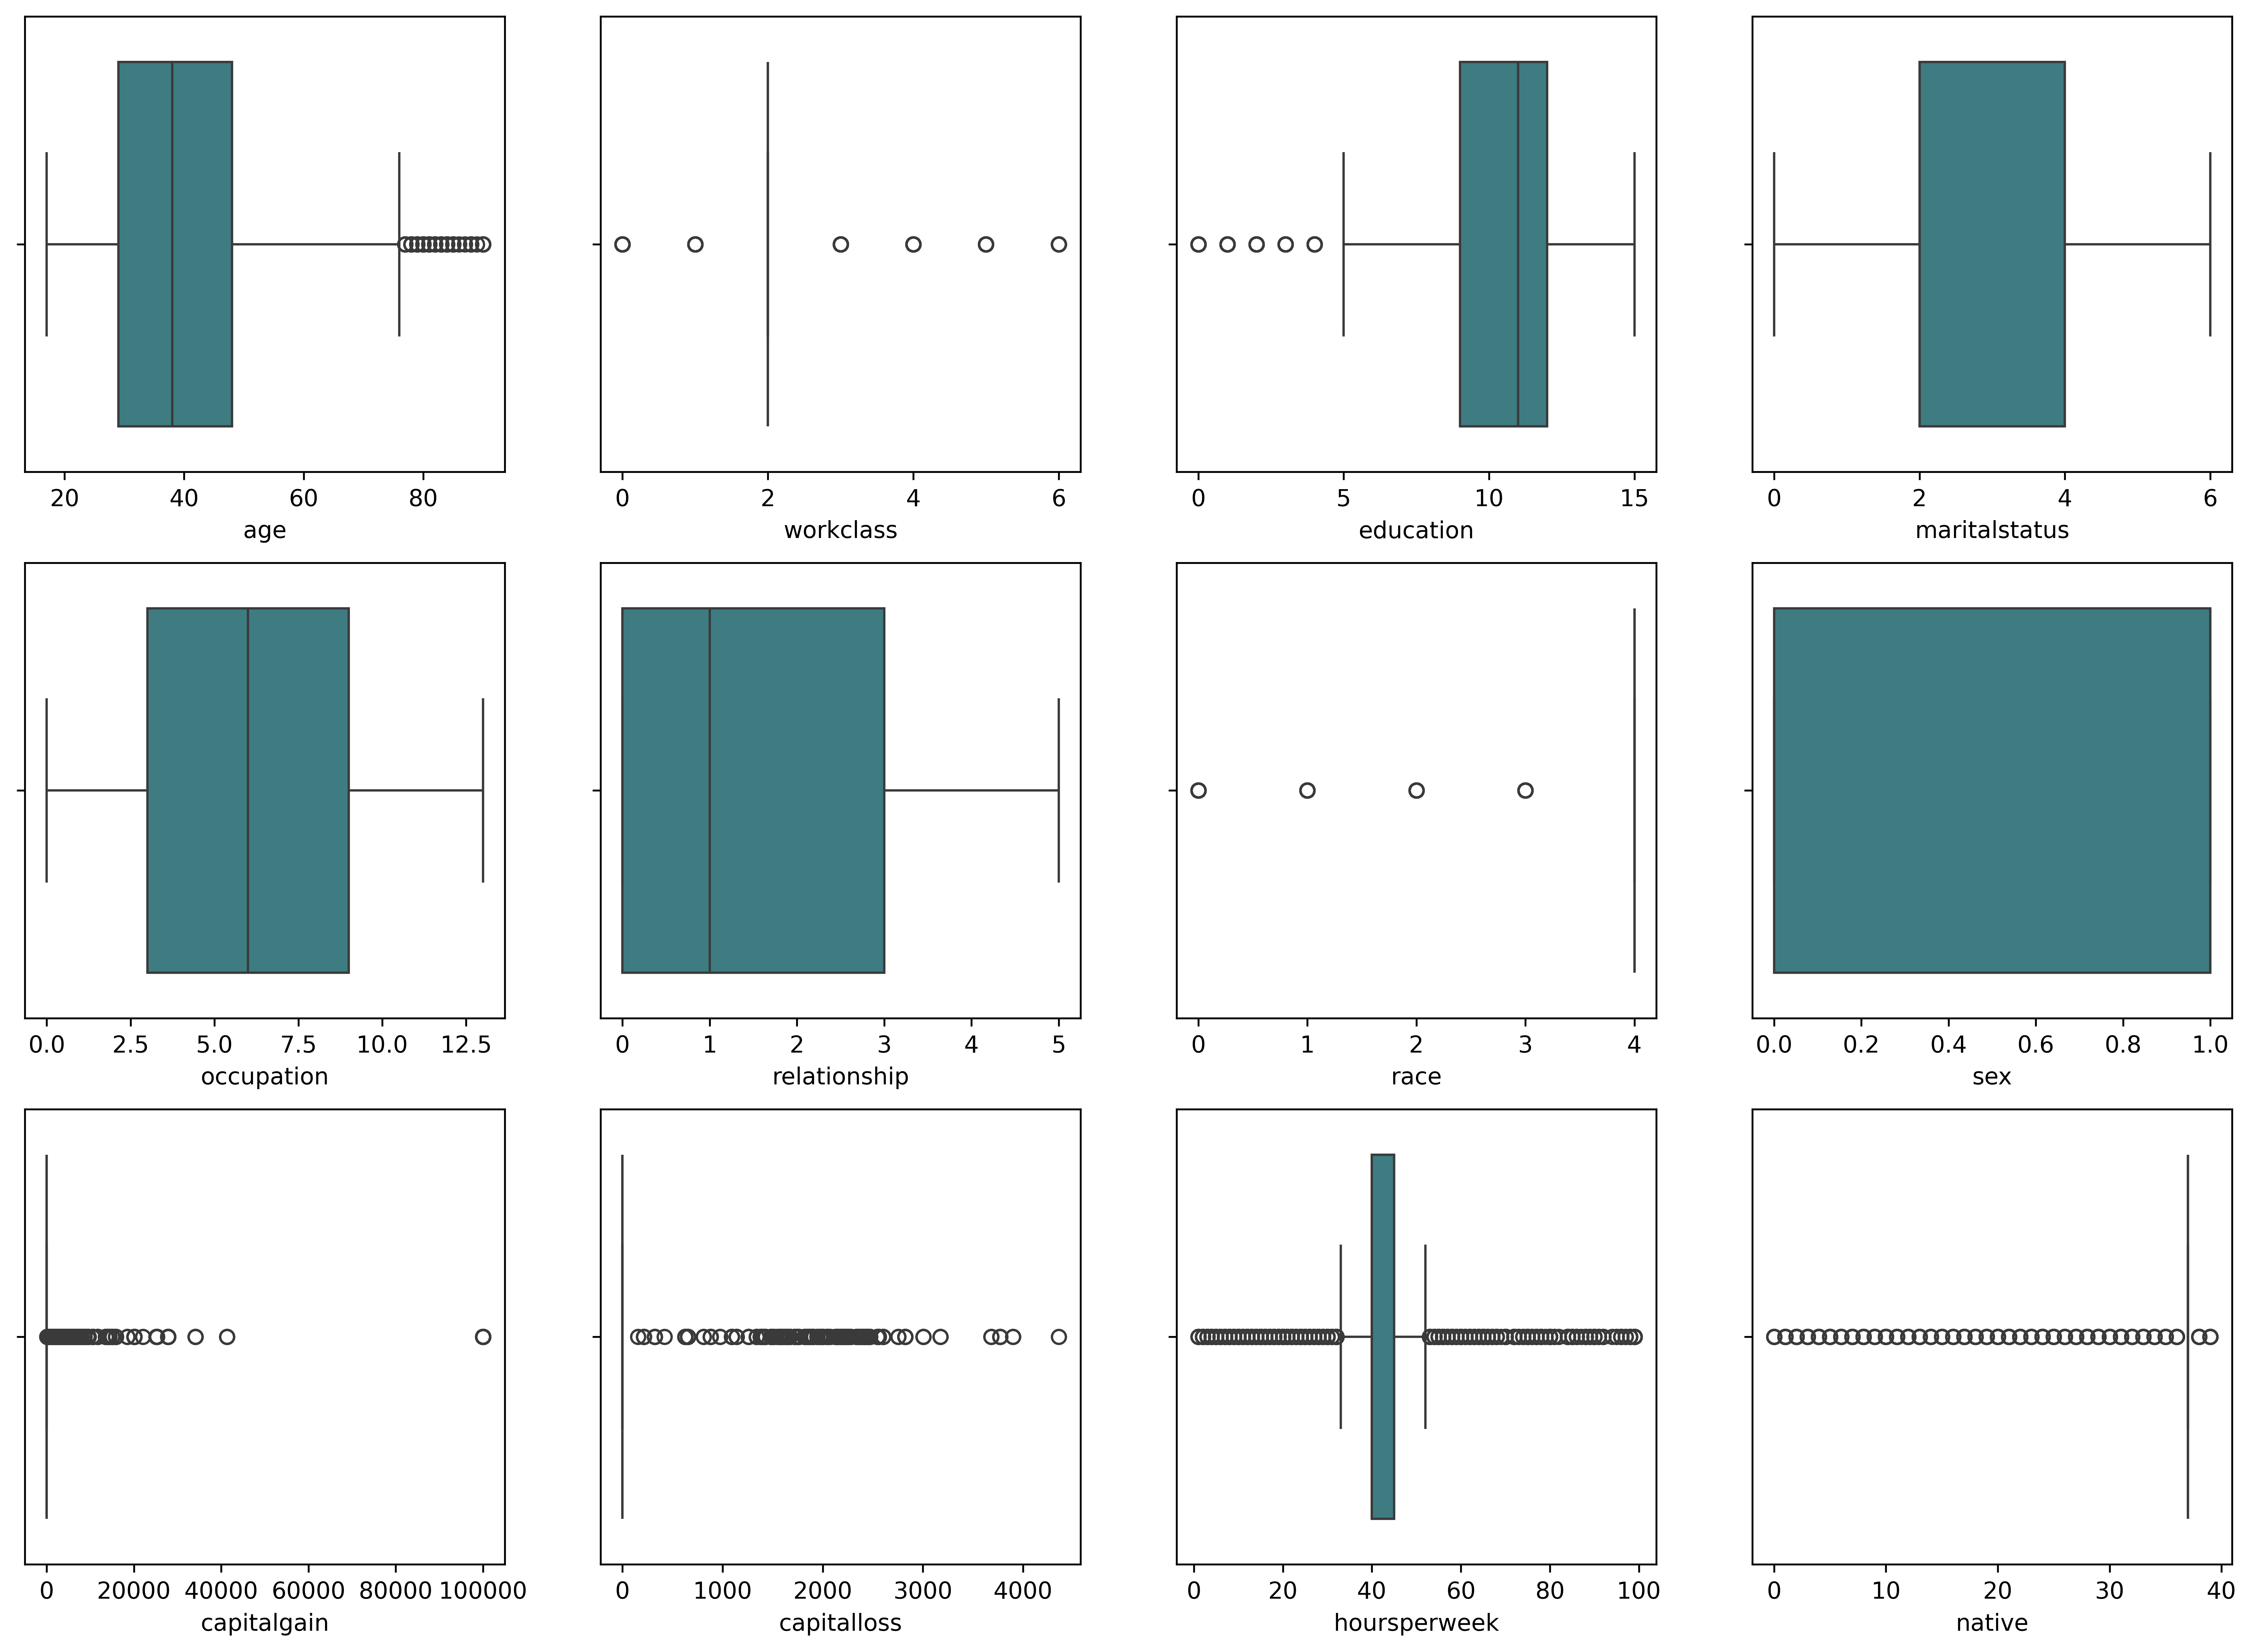

In [46]:
fig, ax = plt.subplots(3,4, figsize = (17,12),dpi=600)

sns.boxplot(data.age,palette='crest', ax = ax[0,0],orient='h')
sns.boxplot(data.workclass,palette='crest', ax = ax[0,1],orient='h')
sns.boxplot(data.education,palette='crest', ax = ax[0,2],orient='h')
sns.boxplot(data.maritalstatus,palette='crest', ax = ax[0,3],orient='h')
sns.boxplot(data.occupation,palette='crest', ax = ax[1,0],orient='h')
sns.boxplot(data.relationship,palette='crest', ax = ax[1,1],orient='h')
sns.boxplot(data.race,palette='crest', ax = ax[1,2],orient='h')
sns.boxplot(data.sex,palette='crest', ax = ax[1,3],orient='h')
sns.boxplot(data.capitalgain,palette='crest', ax = ax[2,0],orient='h')
sns.boxplot(data.capitalloss,palette='crest', ax = ax[2,1],orient='h')
sns.boxplot(data.hoursperweek,palette='crest', ax = ax[2,2],orient='h')
sns.boxplot(data.native,palette='crest', ax = ax[2,3],orient='h')
plt.show()

In [22]:
train_x = train_data.iloc[:,0:13]
train_y = train_data.iloc[:,-1]
test_x = test_data.iloc[:,0:13]
test_y = test_data.iloc[:,-1]

## Model Training

In [23]:
from sklearn.naive_bayes import GaussianNB

classifier_gnb = GaussianNB()
classifier_gnb.fit(train_x, train_y)

GaussianNB()

### Model Predictions

In [24]:
y_pred = classifier_gnb.predict(test_x)
y_pred

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' >50K', ' <=50K'],
      dtype='<U6')

### Accuracy Score, Confusion Matrix

In [25]:
from sklearn.metrics import accuracy_score
print(accuracy_score(test_y,y_pred))

0.7951875442321302


In [26]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_y, y_pred)
print(cm)

[[10056   564]
 [ 2330  1180]]


In [27]:
# print classification report
from sklearn.metrics import classification_report
print(classification_report(test_y, y_pred))

              precision    recall  f1-score   support

       <=50K       0.81      0.95      0.87     10620
        >50K       0.68      0.34      0.45      3510

    accuracy                           0.80     14130
   macro avg       0.74      0.64      0.66     14130
weighted avg       0.78      0.80      0.77     14130

